In [34]:
#导入必要的包
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

In [42]:
#加载数据集
data1 = loadmat('data1.mat')
data2 = loadmat('data2.mat')
data3 = loadmat('data3.mat')
dataMat1 = data1['X']
# print(dataMat1)
# print(dataMat1.shape)
dataMat2 = data2['X']
# print(dataMat2)
# print(dataMat2.shape)
dataMat3 = data3['X']
# print(dataMat3)
# print(dataMat3.shape)

(5000, 1024)


In [73]:
def pca(data,k):
    #计算数据平均值
    meanData = mean(data,axis = 0)
#     print(meanData)
    #去中心化
    MEAN = data - meanData
#     print(MEAN)
    #计算协方差
    covData = cov(MEAN, rowvar = 0 )
#     print(covData)
    #计算协方差矩阵的特征值和特征向量
    eigenvalues,eigenvectors=np.linalg.eig(covData)
    #对特征值进行从小到大排序，并得到对应的索引 
    eigenvaluessort_index=np.argsort(eigenvalues)
    #对特征值进行逆排序，并保留k的index,根据特征值排序结果得到k个最大的特征向量
    k_eigenvectors=eigenvectors[:,eigenvaluessort_index[:-k-1:-1]]
#     print(k_eigenvectors)
    #数据降维
    downData=np.dot(MEAN,k_eigenvectors)
#     print(downData)
    # 降维后的数据恢复
    downData=np.dot(downData,k_eigenvectors.T) 
    reData=downData+meanData
    return downData, reData
#可视化
def drawData(data, reData):
    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.title("numpy实现")
    plt.scatter(data[:,0], data[:,1], marker='o',s=90)
    plt.plot(reData[:,0],reData[:,1],c='r')
    plt.show()

In [66]:
#分别对data1，data2，data3进行PCA
downData1, reData1 = pca(dataMat1,1)
downData2, reData2 = pca(dataMat2,1)
downData3, reData3 = pca(dataMat3,1)

data1.mat降维后恢复的矩阵形状：
 (50, 2)
data2.mata降维后的矩阵形状：
 (300, 2)


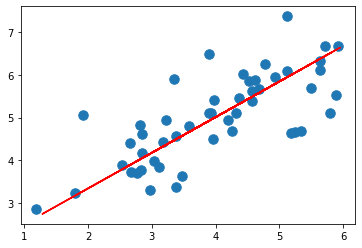

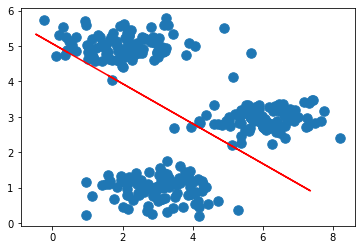

In [67]:
print("data1.mat降维后恢复的矩阵形状：\n",shape(downData1))
print("data2.mata降维后的矩阵形状：\n",shape(downData2))
drawData(dataMat1, reData1)
drawData(dataMat2, reData2)

In [68]:
# # downData2, reData2 = pca(dataMat2,1)
# print("data2.mata降维后的矩阵形状：\n",shape(downData2))
# drawData(dataMat2, reData2)

In [69]:
# downData3, reData3 = pca(dataMat3,1)
# print("降维后的矩阵形状：\n",shape(downData3))
# drawData(dataMat3, reData3)

In [74]:
#导入pca
from sklearn.decomposition import PCA

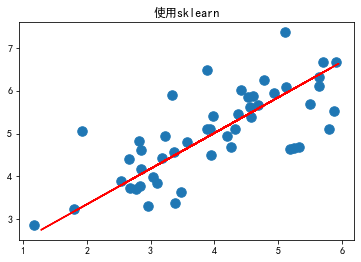

In [79]:
#定义pca模型
drawData(dataMat1, reData1)
model = PCA(n_components=1)
newdata1 = model.fit_transform(dataMat1)
# newdata2 = model.fit_transform(dataMat2)
invX = model.inverse_transform(newdata1)
# invX2 = model.inverse_transform(newdata2)
# print(newdata1)
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.title("使用sklearn")
plt.scatter(dataMat1[:,0], dataMat1[:,1], marker='o',s=90)
plt.plot(invX[:,0],invX[:,1],c='r')
# plt.scatter(dataMat2[:,0], dataMat2[:,1], marker='o',s=90)
# plt.scatter(invX2[:,0],invX2[:,1],c='r')